# Aula 3: Modelos Probabilísticos

### Valor esperado

O valor esperado pode ser aproximado pela média de uma variável aleatória, fato jutificado pela Lei dos Grandes Números, que veremos nas próximas aulas.

**Exemplo:** Seja a variável aleatória X com distribuição abaixo. Calcule E[X] e V(X).
$$
P(X=0) = 0.2,\quad P(X=1) = 0.2, \quad P(X = 2) = 0.6
$$
O valor esperado:
$$
E[X] = 0*0.2 + 1*0.2 + 2*0.6 = 1.4
$$
$$
V(X) = E[X^2]-E[X]^2 = 0.64
$$

In [1]:
import random
import numpy as np
n = 1000 #numero de experimentos
nA = 0
nB = 0
X = [0,0,1,1,2,2,2,2,2]
x_obs = []
for i in range(0,n):
    x_obs.append(random.choice(X))
    
print('Valor esperado de X:', np.mean(x_obs))
print('Variância de X:', np.std(x_obs)**2)

Valor esperado de X: 1.308
Variância de X: 0.679136


### Lançamento de uma moeda

Vamos simular o lançamento de uma moeda nsim vezes e comparar o valor $p$ (probabilidade sair cara) com o valor obtido através de simulações.

In [3]:
import numpy as np
p = 0.6 # probabilidade de sair cara
nsim = 10 # num de experimentos
nhead = 0 # num de caras obtidas
saida = [] # armazena as saidas (cara:1, coroa:0)
for i in range(0, nsim):
    if(np.random.uniform() < p): # se menor que p, cara
        nhead = nhead + 1 # incrementa o contador de caras
        saida.append(1)
    else:
        saida.append(0)
print("Saida:", saida)
print("Frequencia teórica: p= ",p)
print("Frequencia de caras:", nhead/nsim)

Saida: [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]
Frequencia teórica: p=  0.6
Frequencia de caras: 0.5


##  Distribuição binomial

O lançamento de uma moeda $n$ vezes é um processo de Bernoulli, pois há apenas duas saídas possíveis e os experimentos são independentes. Nesse caso, a probabilidade de sair $k$ sucessos em $n$ experimentos é calculada pela distribuição Binomial. 

Vamos considerar o lançamento de uma moeda n vezes e calcular a distribuição teórica e a distribuição de probabilidade associada ao experimento.

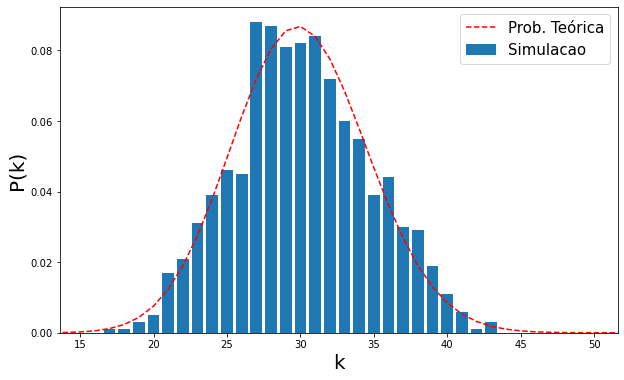

In [4]:
from random import seed
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import binom
import math

seed(100) # semente do gerador de números aleatórios

n = 100 # numero de lançamentos
p = 0.3 # probabilidade de sair cara
Pk = np.zeros(n)
vk = np.arange(0,n)
ns = 1000 # numero de simulacoes
for j in range(0,ns): # faça para ns simulacoes
    S = 0 # numero de sucessos
    for i in range(0,n): # faça para n experimentos
        r = np.random.uniform() #
        if(r <= p): # se o sucesso
            S = S + 1
    Pk[S] = Pk[S] + 1
Pk=Pk/sum(Pk) # normaliza a distribuição de probabilidade
plt.figure(figsize=(10,6))
plt.xlim(0.8*np.min(vk[Pk>0]),1.2*np.max(vk[Pk>0]))
plt.bar(vk, Pk, label='Simulacao')

# curva teórica
Pkt = np.zeros(n+1) # valores teóricos da probabilidade
vkt = np.arange(0,n+1) # variação em k
for k in range(0,n+1): # varia de 0 até n
    C = (math.factorial(n)/(math.factorial(n-k)*math.factorial(k)))
    Pkt[k] = C*(p**k)*(1-p)**(n-k)
plt.plot(vkt, Pkt, 'r--', label='Prob. Teórica')
plt.xlabel('k', fontsize = 20)
plt.ylabel('P(k)',fontsize = 20)
plt.legend(fontsize = 15)
plt.show(True)

Repetindo a análise usando funções do Python:

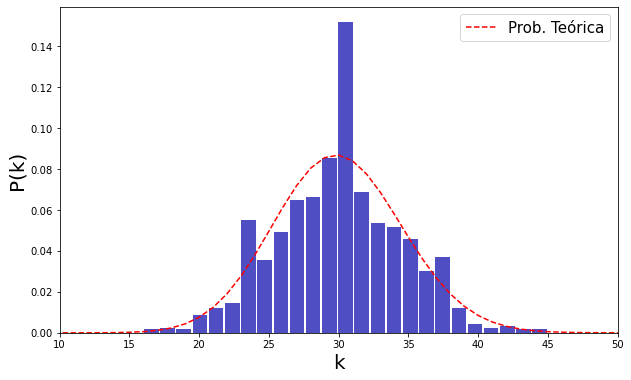

In [5]:
from scipy.stats import binom

seed(100) # semente do gerador de números aleatórios

n = 100 # numero de lançamentos
p = 0.3 # probabilidade de sair cara
ns = 1000 # numero de simulacoes
X = np.random.binomial(n, p, ns) # funcao para gerar valores de uma binomial

plt.figure(figsize=(10,6))
Pk, bins, ignored = plt.hist(X, bins='auto', density=True, color='#0504aa',alpha=0.7, 
                                rwidth=0.9)

# curva teórica
Pkt = np.zeros(n+1) # valores teóricos da probabilidade
vkt = np.arange(0,n+1) # variação em k
for k in range(0,n+1): # varia de 0 até n
    C = (math.factorial(n)/(math.factorial(n-k)*math.factorial(k)))
    Pkt[k] = C*(p**k)*(1-p)**(n-k)
plt.plot(vkt, Pkt, 'r--', label='Prob. Teórica')
plt.xlabel('k', fontsize = 20)
plt.ylabel('P(k)',fontsize = 20)
plt.legend(fontsize = 15)
plt.xlim(10,50)
plt.show(True)

**Exemplo:** Em uma urna há 8 bolas brancas e 4 pretas. Retira-se 5 bolas com reposição. Calcule a probabilidade de que:<br>
a) saiam duas bolas brancas.<br> 

Vamos construir uma função para calcular o valor exato.

In [2]:
import math
def binomial(n,p,k):
    C = (math.factorial(n)/(math.factorial(n-k)*math.factorial(k)))
    pk = C*(p**k)*(1-p)**(n-k)
    return pk

O valor teórico:

In [3]:
n = 5
p = 8/12
k = 2
print('Probabilidade:', binomial(n,p,k))

Probabilidade: 0.16460905349794244


In [33]:
from scipy.stats import binom
#binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)

ns = 1000 #numero de experimentos
X = ['B','B','B','B','B','B','B','B','P','P','P','P']
n = 5 # numero de bolas retiradas
k = 0
for i in range(0,ns):
    saida = []
    for j in range(0,n):
        bola = random.choice(X)
        saida.append(bola)
    nbrancas = 0
    for s in saida:
        if(s == 'B'):
            nbrancas = nbrancas + 1
    if(nbrancas == 2):
        k = k + 1 # se sair branca, temos mais um sucesso
    
print('Valor teórico:', binom.pmf(2, 5, 8/12))
print('Valor obtido = ', k/ns)

Valor teórico: 0.16460905349794241
Valor obtido =  0.169


b) saiam ao menos 3 pretas.<br>

Valor teórico.

In [25]:
n = 5
p = 4/12
k = 2
pk = 0
for k in range(3,6):
    pk = pk + binomial(n,p,k)
print('Valor teórico:', pk)

Valor teórico: 0.20987654320987656


In [36]:
from scipy.stats import binom
#binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)

ns = 1000 #numero de experimentos
X = ['B','B','B','B','B','B','B','B','P','P','P','P']
n = 5 # numero de bolas retiradas
k = 0
for i in range(0,ns):
    saida = []
    for j in range(0,n):
        bola = random.choice(X)
        saida.append(bola)
    npretas = 0
    for s in saida:
        if(s == 'P'):
            npretas = npretas + 1
    if(npretas >= 3):
        k = k + 1
    
print('Valor teórico:', pk)
print('Valor obtido = ', k/ns)

Valor teórico: 0.20987654320987656
Valor obtido =  0.2


## Modelo de Poisson

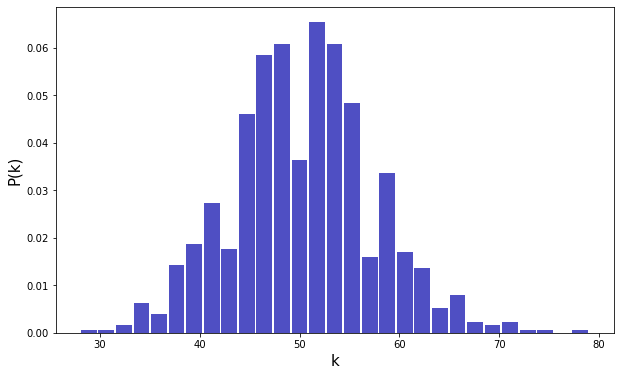

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

lbd = 50 # taxa
ns = 1000 # numero de pontos extraídos de uma distribuição de Poisson
X = np.random.poisson(lam=lbd, size=ns)
plt.figure(figsize=(10,6))
P, bins, ignored = plt.hist(X, bins='auto', density=True, color='#0504aa',alpha=0.7, 
                                rwidth=0.9)
plt.xlabel('k', fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.show(True)

**Exemplo:** Em uma central telefônica, chegam 300 mensagens por hora. Qual é a probabilidade de que:

In [38]:
import numpy as np
import math
def Poisson(lbd, k):
    pk = np.exp(-lbd)*(lbd**k)/math.factorial(k)
    return pk

a) Em um minuto não ocorra nenhuma chamada.

In [39]:
lbd = 5 #numero de chamadas por minuto
k = 0
print("P(k = 0) = ",Poisson(lbd,k))

P(k = 0) =  0.006737946999085467


b) Em dois minutos ocorram duas chamadas.

In [40]:
lbd = 10 #numero de chamadas por 2 minutos
k = 2
print("P(k = 2) = ",Poisson(lbd,k))

P(k = 2) =  0.0022699964881242427


## Modelo exponencial

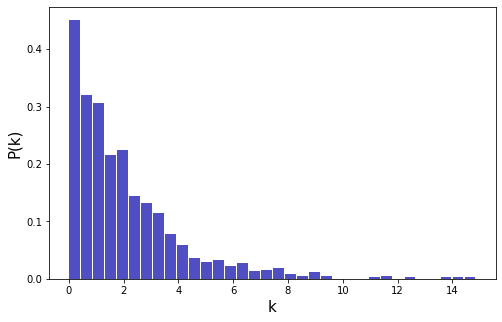

In [41]:
from scipy.stats import expon

alpha = 2
X = expon.rvs(scale=alpha,size=1000)
plt.figure(figsize=(8,5))
P, bins, ignored = plt.hist(X, bins='auto', density=True, color='#0504aa',alpha=0.7, 
                                rwidth=0.9)
plt.xlabel('k', fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.show(True)

## Exercícios de fixação

1 - Seja a variável aleatória X com distribuição abaixo. Calcule E[X].
$$
P(X=0) = 0.4,\quad P(X=1) = 0.4, \quad P(X = 2) = 0.2
$$
Calcule o valor esperado e simule o problema como feito anteriormente.

2 - Em uma urna há 5 bolas brancas e 9 pretas. Retira-se 3 bolas com reposição. Calcule a probabilidade de que:<br>
a) saiam 3 bolas brancas.<br> 
b) saiam ao menos 5 pretas.<br>

3 - Gere dados com distribuição de Poisson com $\lambda = 5$. Verifique se $E[X]=V[X]=\lambda$ usando simulação. Faça isso para diferences valores de $\lambda$.

4 - Gere dados com distribuição exponencial com $\alpha = 2$. Verifique se $E[X] = 1/\alpha$ e $=V[X]=1/\alpha^2$ usando simulação.